In [116]:
import pandas as pd
import sklearn as skl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, recall_score,confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [117]:
filenames = [f'../data/data_20{x}.csv' for x in range(16,23)]

In [128]:
df = pd.concat([pd.read_csv(x) for x in filenames ])

In [129]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,47,48,49,50,51,52,53,k_window,k_index_current,k_index_target
0,0,2016-01-01 00:00:00,6.83609,-3.37934,-12.920500,0.0000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-01 03:00:00+00:00,6.0,5.333
1,1,2016-01-01 00:01:00,6.76732,-3.30194,-12.996700,0.0000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-01 03:00:00+00:00,6.0,5.333
2,2,2016-01-01 00:02:00,6.39107,-2.61173,-13.327100,0.0000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-01 03:00:00+00:00,6.0,5.333
3,3,2016-01-01 00:03:00,6.44897,-2.61525,-13.329900,0.0000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-01 03:00:00+00:00,6.0,5.333
4,4,2016-01-01 00:04:00,6.58758,-2.73082,-13.236100,0.0000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-01 03:00:00+00:00,6.0,5.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,525595,2022-12-31 23:55:00,-1.95967,4.95845,-1.202990,44.4151,0.231726,0.231726,5.561450,16.87790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-01 00:00:00+00:00,4.0,2.333
525596,525596,2022-12-31 23:56:00,-1.82694,4.65083,0.351759,38.3516,0.231726,0.231726,17.396800,12.84820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-01 00:00:00+00:00,4.0,2.333
525597,525597,2022-12-31 23:57:00,-3.77304,3.87694,0.440392,20.2907,0.231726,0.246122,0.885469,9.77093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-01 00:00:00+00:00,4.0,2.333
525598,525598,2022-12-31 23:58:00,-3.18466,4.43666,1.084170,54.5463,0.231726,0.678061,1.230790,26.98440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-01 00:00:00+00:00,4.0,2.333


In [130]:
df.drop(columns=['0','Unnamed: 0','k_window'],axis =1,inplace=True)

In [131]:
df.isna().sum()

1                  16417
2                  16417
3                  16417
4                      0
5                      0
6                      0
7                      0
8                      0
9                      0
10                     0
11                     0
12                     0
13                     0
14                     0
15                     0
16                     0
17                     0
18                     0
19                     0
20                     0
21                     0
22                     0
23                     0
24                     0
25                     0
26                     0
27                     0
28                     0
29                     0
30                     0
31                     0
32                     0
33                     0
34                     0
35                     0
36                     0
37                     0
38                     0
39                     0
40                     0


In [144]:
df.dropna(inplace=True)
Y = df.k_index_target
df.drop(columns=['k_index_target'],axis=1,inplace=True)

In [123]:
# Y = Y.apply(lambda x: 0 if x <=4 else x-4 )

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [151]:
RC = RandomForestRegressor(verbose= 1,n_jobs=-1,n_estimators=60,max_depth=50)
RC.fit(df,Y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 34.6min finished


RandomForestRegressor(max_depth=50, n_estimators=60, n_jobs=-1, verbose=1)

In [154]:
Test = pd.read_csv('../data/data_2023.csv')

In [156]:
Test = pd.read_csv('../data/data_2023.csv')
Test.drop(columns=['0','Unnamed: 0','k_window'],axis =1,inplace=True)
Test.dropna(inplace=True)
Y_Test = Test.k_index_target
Test.drop(columns=['k_index_target'],axis=1,inplace=True)


In [163]:
def test_model(model,x_test,y_test,softmax= False):
    if softmax:
            pred = model.predict(x_test,verbose = 0)
            pred = np.argmax(pred,axis =1)
            pred = np.reshape(pred,newshape=pred.shape[0])
    else:
        pred = model.predict(x_test)
        pred = pd.Series(pred).apply(lambda x: round(x))
        y_test = y_test.apply(lambda x: round(x))
    print(f"accuracy : {accuracy_score(y_test,pred) }, ballanced accuracy: {balanced_accuracy_score(y_test,pred)},recal {recall_score(y_test,pred,average='macro')} ")
    plt.figure(figsize = (25,25))
    sns.heatmap(confusion_matrix(y_test,pred,normalize='true'),annot=True,annot_kws={'fontsize':20})

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.2s finished


accuracy : 0.39342131630929544, ballanced accuracy: 0.21609912807458703,recal 0.21609912807458703 


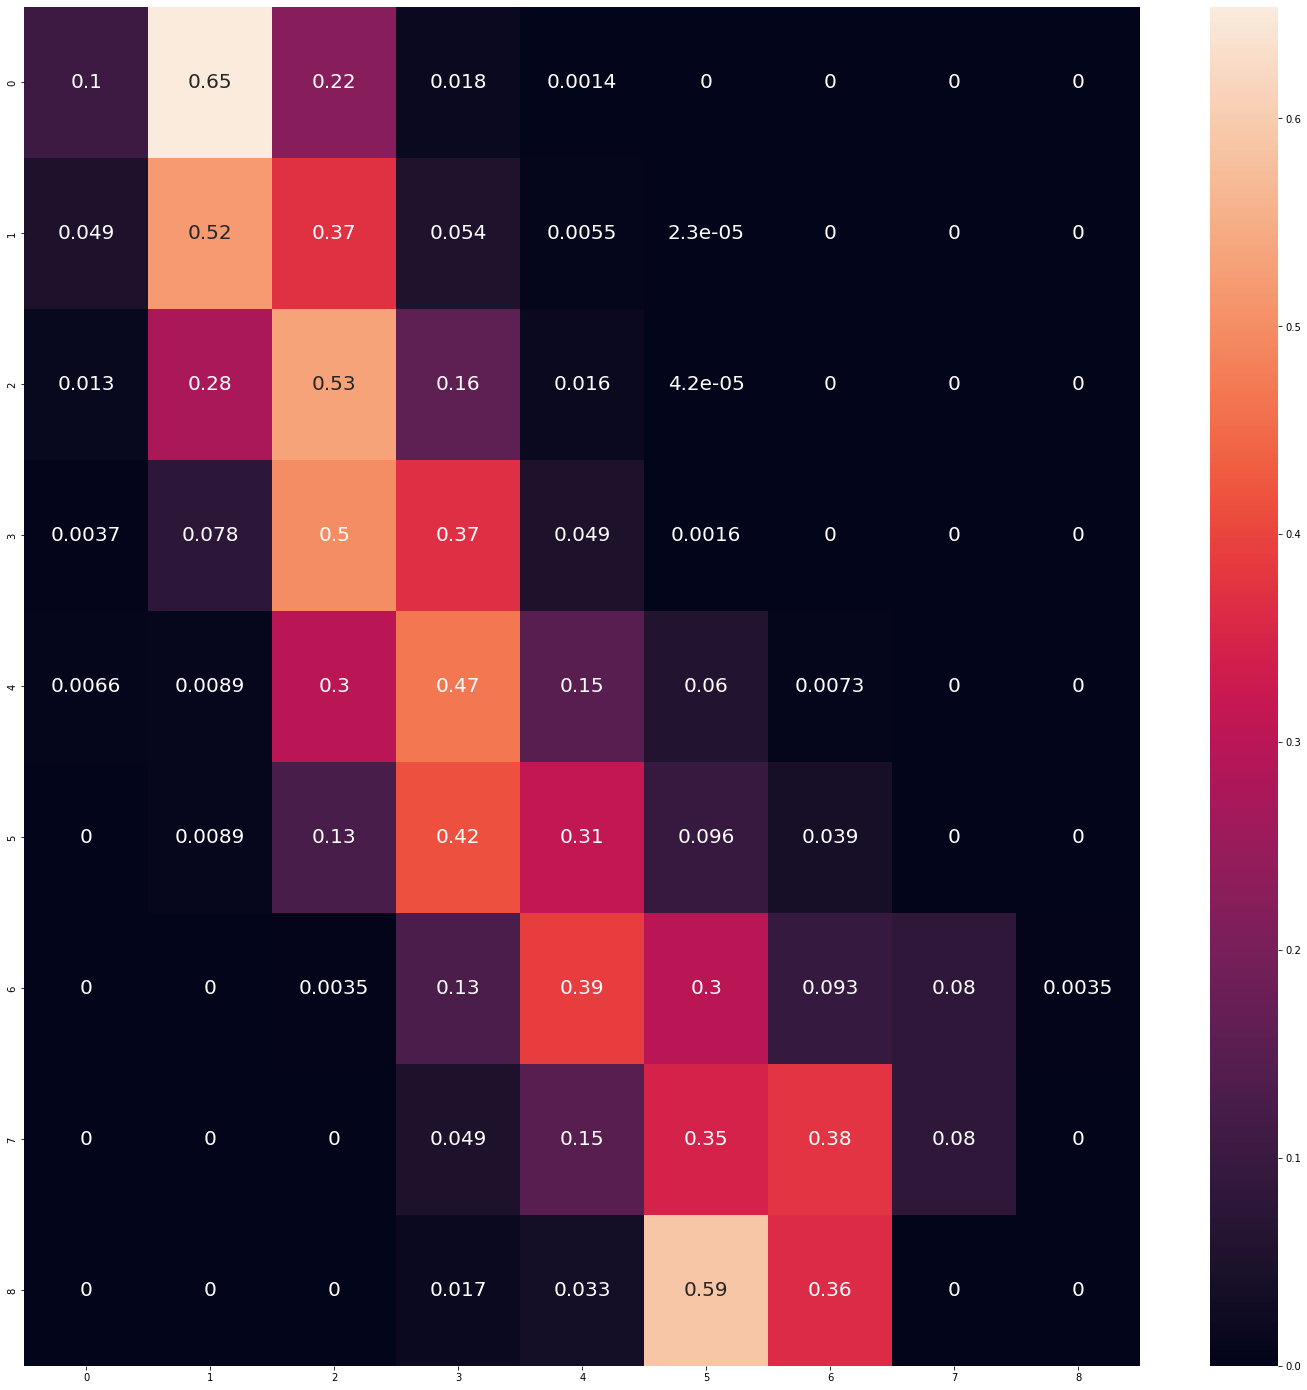

In [164]:
test_model(RC,Test,Y_Test)